### Import packages

In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("country_vaccinations.csv")
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Algeria,DZA,2021-01-29,0.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
1,Algeria,DZA,2021-01-30,30.0,NaN,NaN,30.0,30.0,0.00,NaN,NaN,1.0,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
2,Andorra,AND,2021-01-25,576.0,576.0,NaN,NaN,NaN,0.75,0.75,NaN,NaN,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
3,Andorra,AND,2021-01-26,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,854.0,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
4,Andorra,AND,2021-01-27,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,854.0,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...


### Inspect Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2418 entries, 0 to 2417
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              2418 non-null   object 
 1   iso_code                             2189 non-null   object 
 2   date                                 2418 non-null   object 
 3   total_vaccinations                   1575 non-null   float64
 4   people_vaccinated                    1303 non-null   float64
 5   people_fully_vaccinated              756 non-null    float64
 6   daily_vaccinations_raw               1288 non-null   float64
 7   daily_vaccinations                   2321 non-null   float64
 8   total_vaccinations_per_hundred       1575 non-null   float64
 9   people_vaccinated_per_hundred        1303 non-null   float64
 10  people_fully_vaccinated_per_hundred  756 non-null    float64
 11  daily_vaccinations_per_million

In [3]:
df.shape

(2418, 15)

### Checking for missing values

In [13]:
for i in range(len(df.columns)):
    missing_data = df[df.columns[i]].isna().sum()
    perc = missing_data / len(df) * 100
    print(f'Feature {i+1}  {df.columns[i]} >> Missing entries: {missing_data}  |  Percentage: {round(perc, 2)}')

Feature 1  country >> Missing entries: 0  |  Percentage: 0.0
Feature 2  iso_code >> Missing entries: 229  |  Percentage: 9.47
Feature 3  date >> Missing entries: 0  |  Percentage: 0.0
Feature 4  total_vaccinations >> Missing entries: 843  |  Percentage: 34.86
Feature 5  people_vaccinated >> Missing entries: 1115  |  Percentage: 46.11
Feature 6  people_fully_vaccinated >> Missing entries: 1662  |  Percentage: 68.73
Feature 7  daily_vaccinations_raw >> Missing entries: 1130  |  Percentage: 46.73
Feature 8  daily_vaccinations >> Missing entries: 97  |  Percentage: 4.01
Feature 9  total_vaccinations_per_hundred >> Missing entries: 843  |  Percentage: 34.86
Feature 10  people_vaccinated_per_hundred >> Missing entries: 1115  |  Percentage: 46.11
Feature 11  people_fully_vaccinated_per_hundred >> Missing entries: 1662  |  Percentage: 68.73
Feature 12  daily_vaccinations_per_million >> Missing entries: 97  |  Percentage: 4.01
Feature 13  vaccines >> Missing entries: 0  |  Percentage: 0.0
Featu

<AxesSubplot:>

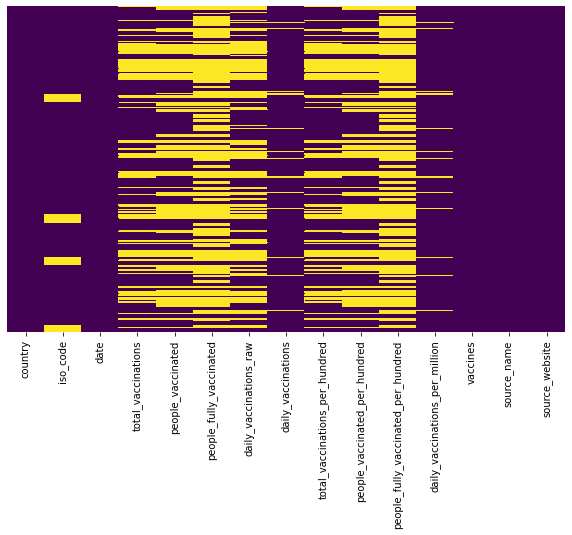

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)


In [9]:
df.vaccines.value_counts()

Pfizer/BioNTech                          1057
Moderna, Pfizer/BioNTech                  624
Oxford/AstraZeneca, Pfizer/BioNTech       275
Sputnik V                                  79
Pfizer/BioNTech, Sinopharm                 79
Pfizer/BioNTech, Sinovac                   54
Sinovac                                    51
Sinopharm, Sinovac                         51
Oxford/AstraZeneca, Sinopharm              36
Oxford/AstraZeneca                         31
Pfizer/BioNTech, Sinopharm, Sputnik V      29
Covaxin, Oxford/AstraZeneca                23
Oxford/AstraZeneca, Sinovac                22
Sinopharm                                   7
Name: vaccines, dtype: int64

In [10]:
df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Algeria,DZA,2021-01-29,0.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
1,Algeria,DZA,2021-01-30,30.0,NaN,NaN,30.0,30.0,0.00,NaN,NaN,1.0,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
2,Andorra,AND,2021-01-25,576.0,576.0,NaN,NaN,NaN,0.75,0.75,NaN,NaN,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
3,Andorra,AND,2021-01-26,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,854.0,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
4,Andorra,AND,2021-01-27,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,854.0,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2413,Wales,NaN,2021-02-01,440706.0,439640.0,1066.0,23559.0,21508.0,13.98,13.94,0.03,6822.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
2414,Wales,NaN,2021-02-02,463657.0,462497.0,1160.0,22951.0,21530.0,14.71,14.67,0.04,6829.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
2415,Wales,NaN,2021-02-03,491786.0,490570.0,1216.0,28129.0,22149.0,15.60,15.56,0.04,7025.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
2416,Wales,NaN,2021-02-04,524677.0,523042.0,1635.0,32891.0,23101.0,16.64,16.59,0.05,7327.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...


### Keeping one for each country

In [14]:
df1 = df.drop_duplicates(subset=['country'], keep='last')

In [16]:
df1.vaccines.value_counts()

Pfizer/BioNTech                          36
Moderna, Pfizer/BioNTech                 16
Oxford/AstraZeneca                        6
Oxford/AstraZeneca, Pfizer/BioNTech       5
Sputnik V                                 4
Pfizer/BioNTech, Sinopharm                2
Oxford/AstraZeneca, Sinopharm             2
Pfizer/BioNTech, Sinovac                  2
Sinovac                                   2
Sinopharm, Sinovac                        1
Pfizer/BioNTech, Sinopharm, Sputnik V     1
Covaxin, Oxford/AstraZeneca               1
Sinopharm                                 1
Oxford/AstraZeneca, Sinovac               1
Name: vaccines, dtype: int64

In [19]:
df.groupby("country").max("total_vaccinations")

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
country,,,,,,,,,
Algeria,30.0,NaN,NaN,30.0,30.0,0.00,NaN,NaN,1.0
Andorra,1036.0,1036.0,NaN,NaN,66.0,1.34,1.34,NaN,854.0
Argentina,471383.0,307501.0,163882.0,47456.0,16574.0,1.04,0.68,0.36,367.0
Austria,270267.0,208144.0,62123.0,19357.0,12278.0,3.00,2.31,0.69,1363.0
Bahrain,182543.0,182543.0,NaN,14340.0,11106.0,10.73,10.73,NaN,6527.0
...,...,...,...,...,...,...,...,...,...
Turkey,2601717.0,NaN,NaN,337200.0,308326.0,3.08,NaN,NaN,3656.0
United Arab Emirates,4201347.0,3951347.0,250000.0,284857.0,155311.0,42.48,39.95,2.53,15703.0
United Kingdom,11975267.0,11465210.0,510057.0,609010.0,445128.0,17.64,16.89,0.75,6557.0
